In [42]:
# !pip install opencv-python
# !pip install matplotlib

In [1]:
import cv2

In [7]:
protoFile = "model\\pose_deploy.prototxt"
weightsFile = "model\\pose_iter_102000.caffemodel"
nPoints = 22

frame = cv2.imread("C:\\Users\\SIBSANKAR\\Desktop\\dev\\hand.jpg")
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)
cv2.imshow('Output-Keypoints', frame)

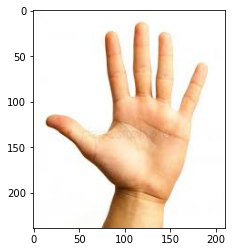

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
inHeight,inWidth,_ = frame.shape
frame.shape

(239, 211, 3)

In [10]:
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()

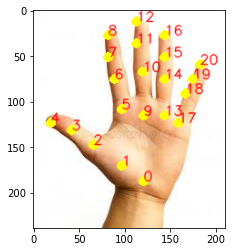

In [11]:
points = []
frameHeight,frameWidth,_=frame.shape
frameCopy=frame.copy()
threshold=.1
for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (frameWidth, frameHeight))

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    if prob > threshold :
        cv2.circle(frameCopy, (int(point[0]), int(point[1])), 5, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, .5, (0, 0, 255), 1, lineType=cv2.LINE_AA)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(point[0]), int(point[1])))
    else :
        points.append(None)
# cv2.imshow('Output-Keypoints', frameCopy)
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.show()

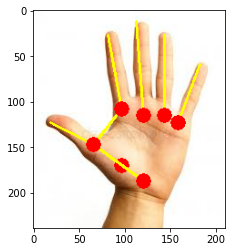

In [16]:
# Draw Skeleton
POSE_PAIRS=[]
POSE_PAIRS.append((0,2))
POSE_PAIRS.append((2,4))
POSE_PAIRS.append((2,5))
POSE_PAIRS.append((5,8))
POSE_PAIRS.append((9,12))
POSE_PAIRS.append((13,16))
POSE_PAIRS.append((17,20))
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 2)
        cv2.circle(frame, points[partA], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

# cv2.imshow('Output-Skeleton', frame)
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Wed Dec 16 13:07:33 2020

@author: SIBSANKAR
"""

import cv2 
  
  
# define a video capture object 
vid = cv2.VideoCapture(0) 
  
while(True): 
      
    # Capture the video frame 
    # by frame 
    ret, frame = vid.read() 
    scale_percent = 50

#calculate the 50 percent of original dimensions
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    
    # dsize
    dsize = (width, height)
    
    # resize image
    frame = cv2.resize(frame, dsize)
    # Display the resulting frame 
    cv2.imshow('frame', frame) 
      
    # the 'q' button is set as the 
    # quitting button you may use any 
    # desired button of your choice 
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
  
# After the loop release the cap object 
vid.release() 
# Destroy all the windows 
cv2.destroyAllWindows() 

AttributeError: 'NoneType' object has no attribute 'shape'